In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
import sys
sys.path.append('../src')

from utils import extract_all
import config as cfg

In [3]:
zip_files = [f for f in os.listdir(cfg.DATASET_PATH) if f.endswith('.zip') or f.endswith('.7z')]
if len(zip_files) == 1:
    zip_path = os.path.join(cfg.DATASET_PATH, zip_files[0])
    extract_all(zip_path)
else:
    print('Разархивация не требуется')

Разархивация не требуется


In [4]:
train = pd.read_csv(f'{cfg.DATASET_PATH}/train.csv')
songs = pd.read_csv(f'{cfg.DATASET_PATH}/songs.csv')
test = pd.read_csv(f'{cfg.DATASET_PATH}/test.csv')

# Общий анализ

In [7]:
import numpy as np

print('Статистика по песням: ')
songs_in_train_and_test = np.intersect1d(train['song_id'].unique(), test['song_id'].unique())
print(f"Уникальных песен в обучающем наборе: {train['song_id'].nunique()}, в тестовом наборе: {test['song_id'].nunique()}")
print(f"Количество уникальных песен только в тестовом наборе: {test['song_id'].nunique() - songs_in_train_and_test.shape[0]}")
print(f"Доля уникальных песен только в тестовом наборе: {(test['song_id'].nunique() - songs_in_train_and_test.shape[0]) / test['song_id'].nunique():.2f}")
print()

print('Статистика по пользователям: ')
users_in_train_and_test = np.intersect1d(train['msno'].unique(), test['msno'].unique())
print(f"Уникальных пользователей в обучающем наборе: {train['msno'].nunique()}, в тестовом наборе: {test['msno'].nunique()}")
print(f"Количество уникальных пользователей только в тестовом наборе: {test['msno'].nunique() - users_in_train_and_test.shape[0]}")
print(f"Доля уникальных пользователей только в тестовом наборе: {(test['msno'].nunique() - users_in_train_and_test.shape[0]) / test['msno'].nunique():.2f}")
print()

train_merged = train.merge(songs[['song_id', 'artist_name', 'genre_ids', 'language']], on='song_id')
test_merged = test.merge(songs[['song_id', 'artist_name', 'genre_ids', 'language']], on='song_id')

print('Статистика по исполнителям: ')
artists_in_train_and_test = np.intersect1d(train_merged['artist_name'].unique(), test_merged['artist_name'].unique())
print(f"Уникальных исполнителей в обучающем наборе: {train_merged['artist_name'].nunique()}, в тестовом наборе: {test_merged['artist_name'].nunique()}")
print(f"Количество уникальных исполнителей только в тестовом наборе: {test_merged['artist_name'].nunique() - artists_in_train_and_test.shape[0]}")
print(f"Доля уникальных исполнителей только в тестовом наборе: {(test_merged['artist_name'].nunique() - artists_in_train_and_test.shape[0]) / test_merged['artist_name'].nunique():.2f}")
print()

print('Статистика по языкам: ')
langs_in_train_and_test = np.intersect1d(train_merged['language'].unique(), test_merged['language'].unique())
print(f"Языков представлено в обучающем наборе: {train_merged['language'].nunique()}, в тестовом наборе: {test_merged['language'].nunique()}")
print(f"Количество языков только в тестовом наборе: {test_merged['language'].nunique() - langs_in_train_and_test.shape[0]}")
print(f"Доля языков только в тестовом наборе: {(test_merged['language'].nunique() - langs_in_train_and_test.shape[0]) / test_merged['language'].nunique():.2f}")
print()

print('Статистика по жанрам: ')
genres_in_train_and_test = np.intersect1d(train_merged['genre_ids'].apply(str).unique(), test_merged['genre_ids'].apply(str).unique())
print(f"Жанров представлено в обучающем наборе: {train_merged['genre_ids'].nunique()}, в тестовом наборе: {test_merged['genre_ids'].nunique()}")
print(f"Количество жанров только в тестовом наборе: {test_merged['genre_ids'].nunique() - genres_in_train_and_test.shape[0]}")
print(f"Доля жанров только в тестовом наборе: {(test_merged['genre_ids'].nunique() - genres_in_train_and_test.shape[0]) / test_merged['genre_ids'].nunique():.2f}")


Статистика по песням: 
Уникальных песен в обучающем наборе: 359966, в тестовом наборе: 224753
Количество уникальных песен только в тестовом наборе: 59873
Доля уникальных песен только в тестовом наборе: 0.27

Статистика по пользователям: 
Уникальных пользователей в обучающем наборе: 30755, в тестовом наборе: 25131
Количество уникальных пользователей только в тестовом наборе: 3648
Доля уникальных пользователей только в тестовом наборе: 0.15

Статистика по исполнителям: 
Уникальных исполнителей в обучающем наборе: 40582, в тестовом наборе: 27563
Количество уникальных исполнителей только в тестовом наборе: 5790
Доля уникальных исполнителей только в тестовом наборе: 0.21

Статистика по языкам: 
Языков представлено в обучающем наборе: 10, в тестовом наборе: 10
Количество языков только в тестовом наборе: 0
Доля языков только в тестовом наборе: 0.00

Статистика по жанрам: 
Жанров представлено в обучающем наборе: 572, в тестовом наборе: 501
Количество жанров только в тестовом наборе: 35
Доля жа

Очевидно песня может иметь несколько жанров и т.к. я не делал никакой предобработки для жанров, то если: песня1 имеет жанр 1, песня2 имеет жанр 2, а песня3 в тестовом наборе имеет жанр 1|2 (что означает, что у нее жанр 1 и 2), то это будет считаться что жанр от песня3 *не появлялся* в тренировочном наборе.

Так что, скорее всего, **реальное кол-во жанров песен меньше**

# Анализ песен

In [8]:
listen_log = train[['msno','song_id','target']].merge(songs,on='song_id')

listen_log_groupby = listen_log[['song_id', 'target']].groupby(['song_id']).agg(['mean',
                                                                                 'count'])
listen_log_groupby.reset_index(inplace=True)
listen_log_groupby.columns = list(map(''.join, listen_log_groupby.columns.values))
listen_log_groupby.columns = ['song_id', 'repeat_play_chance', 'plays']  # переименуем

song_data = listen_log_groupby.merge(songs, on='song_id') # мёрджим song data с вычисленными значениями

song_data['repeat_events'] = song_data['repeat_play_chance'] * song_data['plays']

In [9]:
song_data['plays'].max()

13973

Найдем зависимость шанса на репит от количества прослушиваний трека

In [11]:
x_plays = []
y_repeat_chance = []

for i in range(1,song_data['plays'].max()+1):
    plays_i = song_data[song_data['plays']==i]
    count = plays_i['plays'].sum()
    if count > 0:
        x_plays.append(i)
        y_repeat_chance.append(plays_i['repeat_events'].sum() / count)

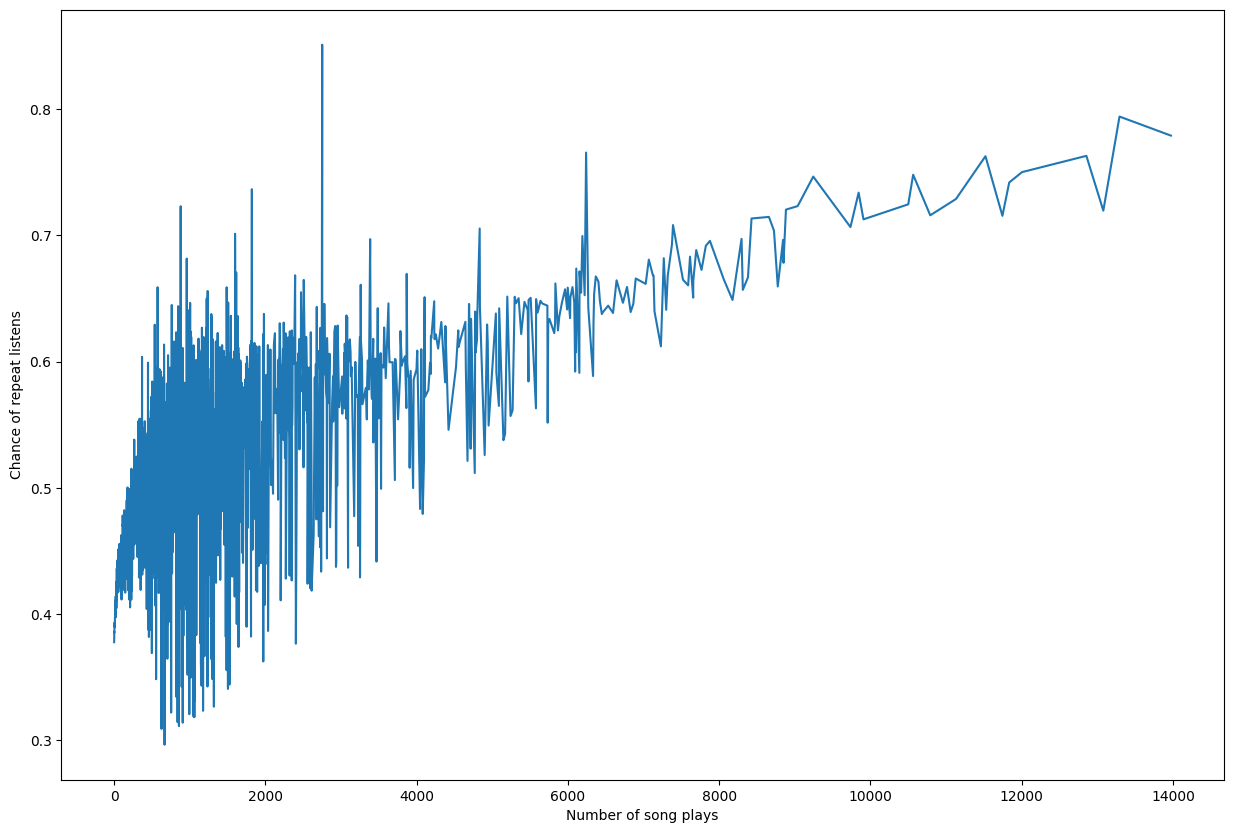

In [12]:
f,axarray = plt.subplots(1,1,figsize=(15,10))
plt.xlabel('Number of song plays')
plt.ylabel('Chance of repeat listens')
plt.plot(x_plays, y_repeat_chance)

# Анализ кол-ва жанров, композиторов и певцов

In [13]:
def count_vals(x):
    # считаем кол-во значений (в том числе множественные значения через '|')
    if type(x) != str:
        return 1
    else:
        return 1 + x.count('|')

In [14]:
song_data['number_of_genres'] = song_data['genre_ids'].apply(count_vals)
song_data['number_of_composers'] = song_data['composer'].apply(count_vals)
song_data['number_of_lyricists'] = song_data['lyricist'].apply(count_vals)

In [15]:
n_genres_max = song_data['number_of_genres'].max()
n_composers_max = song_data['number_of_composers'].max()
n_lyricists_max = song_data['number_of_lyricists'].max()

print(n_genres_max, n_composers_max, n_lyricists_max)

8 51 23


In [18]:
max_comp_song = song_data.iloc[song_data['number_of_composers'].idxmax()]
max_lyr_song = song_data.iloc[song_data['number_of_lyricists'].idxmax()]
pd.set_option('display.max_colwidth', 200)
print(max_comp_song[['artist_name', 'composer', 'lyricist', 'number_of_composers',
                     'number_of_lyricists']], '\n')
print(max_lyr_song[['artist_name', 'composer', 'lyricist', 'number_of_composers',
                    'number_of_lyricists']])

artist_name                                                                                                                                                                                                             SHINee
composer               Korean Lyrics by Kim| Jong Hyun (12.5%) Harvey Mason| Jr. / Steven,,31\nw1zMqFE+5ynBzZil7EKEh2HvNHDLNvnlQ+al7cRBqjw=,281913,465,Madonna,,,52\nRcGEZpOfi+Y9D7JIIcUtyGP2MddfnhVzhfKKhEAJAtM=,210372,20...
lyricist                                                                                                                                                                                Andreas "Quiz" Romdhane| Savan Kotecha
number_of_composers                                                                                                                                                                                                         51
number_of_lyricists                                                                                         

Похоже на плохие данные (не может у одной песни быть 51 композитор и, аналогично, с певцами). Исправим это и посмотрим повлияет ли это как то на данные

In [19]:
x_genres = list(range(1,n_genres_max+1))
x_composers = list(range(1,n_composers_max+1))
x_lyricists = list(range(1,n_lyricists_max+1))

y_genres = [song_data[song_data['number_of_genres'] == x].shape[0] for x in x_genres]
y_composers = [song_data[song_data['number_of_composers'] == x].shape[0] for x in x_composers]
y_lyricists = [song_data[song_data['number_of_lyricists'] == x].shape[0] for x in x_lyricists]


# now, we get some zero values for the # of composers and # lyricists, lets get rid of them
empty_ids = [i for i, y in enumerate(y_composers) if y == 0]
x_composers_fixed = [x_composers[i] for i in range(0,n_composers_max) if i not in empty_ids]
y_composers_fixed = [y_composers[i-1] for i in x_composers_fixed]

empty_ids = [i for i, y in enumerate(y_lyricists) if y == 0]
x_lyricists_fixed = [x_lyricists[i] for i in range(0,n_lyricists_max) if i not in empty_ids]
y_lyricists_fixed = [y_lyricists[i-1] for i in x_lyricists_fixed]

y_repeat_chance_g = []
y_plays_g = []

for i in range(1,n_genres_max+1):
    genres_i = song_data[song_data['number_of_genres']==i]
    count = genres_i['plays'].sum()
    y_repeat_chance_g.append(genres_i['repeat_events'].sum() / count)
    y_plays_g.append(count)

y_repeat_chance_c = []
y_plays_c = []

for i in x_composers_fixed:
    composers_i = song_data[song_data['number_of_composers']==i]
    count = composers_i['plays'].sum()
    y_repeat_chance_c.append(composers_i['repeat_events'].sum() / count)
    y_plays_c.append(count)

y_repeat_chance_l = []
y_plays_l = []

for i in x_lyricists_fixed:
    lyricists_i = song_data[song_data['number_of_lyricists']==i]
    count = lyricists_i['plays'].sum()
    y_repeat_chance_l.append(lyricists_i['repeat_events'].sum() / count)
    y_plays_l.append(count)

Text(0.5, 0, '# of lyricists')

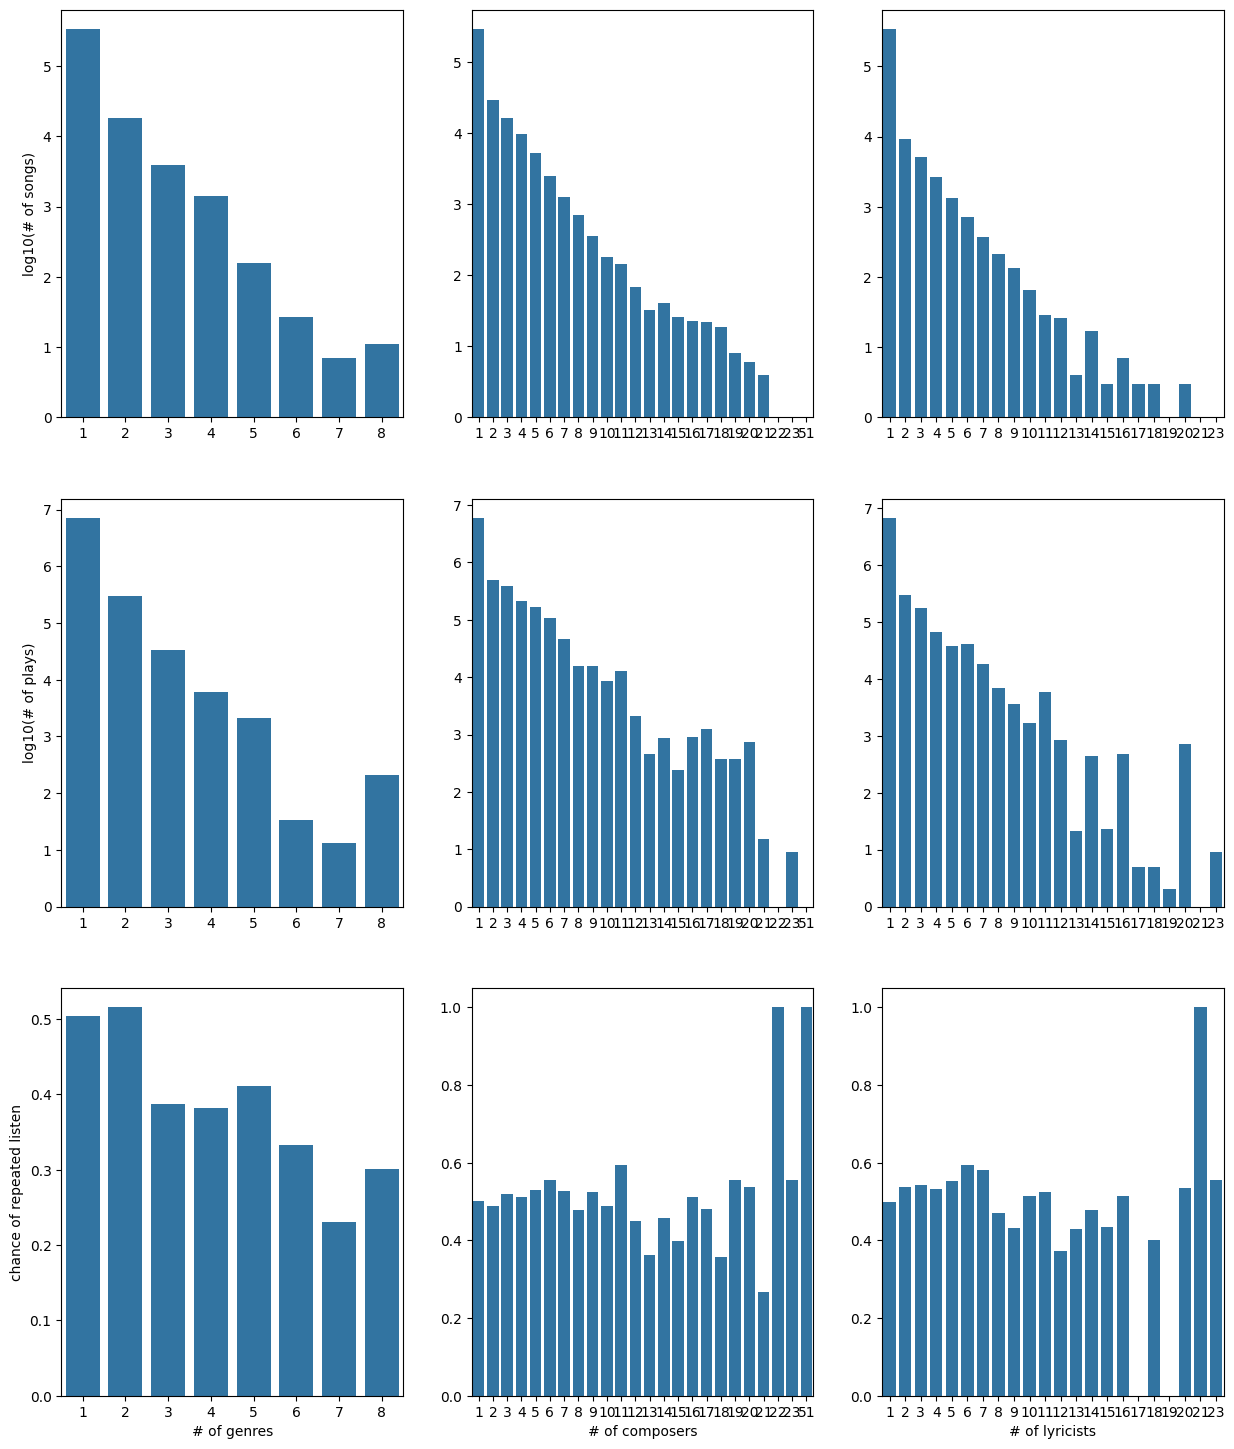

In [20]:
fig = plt.figure(figsize=(15, 18))

ax331 = plt.subplot(3,3,1)
sns.barplot(x=x_genres,y=np.log10(y_genres))
ax331.set_ylabel('log10(# of songs)')
ax334 = plt.subplot(3,3,4)
sns.barplot(x=x_genres,y=np.log10(y_plays_g))
ax334.set_ylabel('log10(# of plays)')
ax337 = plt.subplot(3,3,7)
sns.barplot(x=x_genres,y=y_repeat_chance_g)
ax337.set_xlabel('# of genres')
ax337.set_ylabel('chance of repeated listen')

plt.subplot(3,3,2)
sns.barplot(x=x_composers_fixed,y=np.log10(y_composers_fixed))
plt.subplot(3,3,5)
sns.barplot(x=x_composers_fixed,y=np.log10(y_plays_c))
ax338 = plt.subplot(3,3,8)
sns.barplot(x=x_composers_fixed,y=y_repeat_chance_c)
ax338.set_xlabel('# of composers')


plt.subplot(3,3,3)
sns.barplot(x=x_lyricists_fixed,y=np.log10(y_lyricists_fixed))
plt.subplot(3,3,6)
sns.barplot(x=x_lyricists_fixed,y=np.log10(y_plays_l))
ax339 = plt.subplot(3,3,9)
sns.barplot(x=x_lyricists_fixed,y=y_repeat_chance_l)
ax339.set_xlabel('# of lyricists')

Выглядит, как будто кол-во композиторов и певцов не имеют значения на кол-во репитов песни

# Анализ языков в песнях

In [21]:
languages = song_data['language'].unique()
print(languages.shape[0])

language_count = []
language_plays = []
language_repeat_chance = []

for l in languages:
    if not np.isnan(l):
        songs_with_language = song_data[song_data['language']==l]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_events'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)
    else:
        songs_with_language = song_data[pd.isnull(song_data['language'])]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_events'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)

languages[10] = -100  # последнее значение = Nan

11


Имеем 10 языков (т.к. одно из значений это Nan)

Text(0.5, 0, 'Song language')

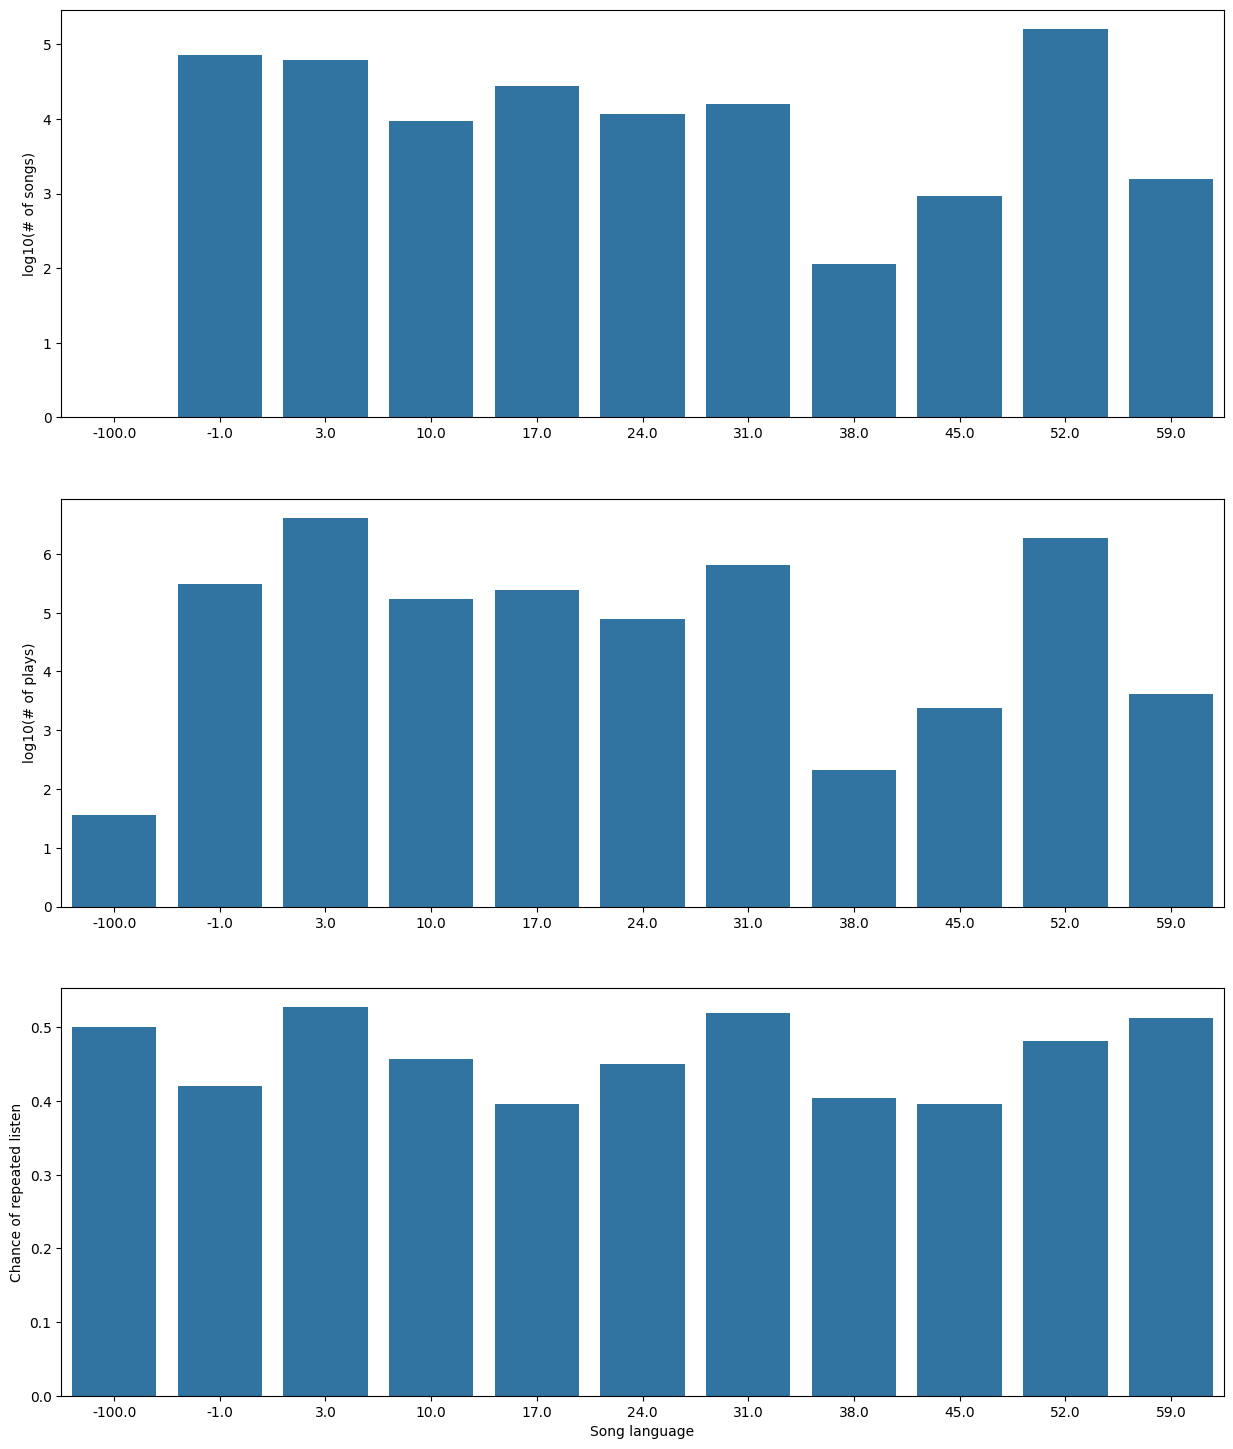

In [22]:
fig = plt.figure(figsize=(15, 18))

ax1 = plt.subplot(3,1,1)
sns.barplot(x=languages,y=np.log10(language_count))
ax1.set_ylabel('log10(# of songs)')
ax2 = plt.subplot(3,1,2)
sns.barplot(x=languages,y=np.log10(language_plays))
ax2.set_ylabel('log10(# of plays)')
ax3 = plt.subplot(3,1,3)
sns.barplot(x=languages,y=language_repeat_chance)
ax3.set_ylabel('Chance of repeated listen')
ax3.set_xlabel('Song language')

# Анализ длительности песни

In [23]:
min_song_length_sec = song_data['song_length'].min() / 1000  # т.к. данные в мс, то переведем их в секунды
max_song_length_sec = song_data['song_length'].max() / 1000
print(min_song_length_sec, max_song_length_sec)
# Прикол, односекундная песня. Похоже на bad data

1.393 10851.706


In [24]:
min_length_song = song_data.iloc[song_data['song_length'].idxmin()]
max_length_song = song_data.iloc[song_data['song_length'].idxmax()]
print(min_length_song[['artist_name', 'composer', 'lyricist', 'number_of_composers',
                       'number_of_lyricists', 'song_length', 'repeat_play_chance']], '\n')
print(max_length_song[['artist_name', 'composer', 'lyricist', 'number_of_composers',
                       'number_of_lyricists', 'song_length', 'repeat_play_chance']])

artist_name                          Trisha Yearwood
composer               Robert E. Irving| Kevin Quinn
lyricist                                         NaN
number_of_composers                                2
number_of_lyricists                                1
song_length                                     1393
repeat_play_chance                               1.0
Name: 11441, dtype: object 

artist_name            Jason Stephenson
composer               Jason Stephenson
lyricist                            NaN
number_of_composers                   1
number_of_lyricists                   1
song_length                    10851706
repeat_play_chance                  1.0
Name: 86377, dtype: object


C:\Users\maxim\AppData\Local\Temp\ipykernel_12344\3727565397.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_data['song_length']/1000, bins=length_bins, kde=False,


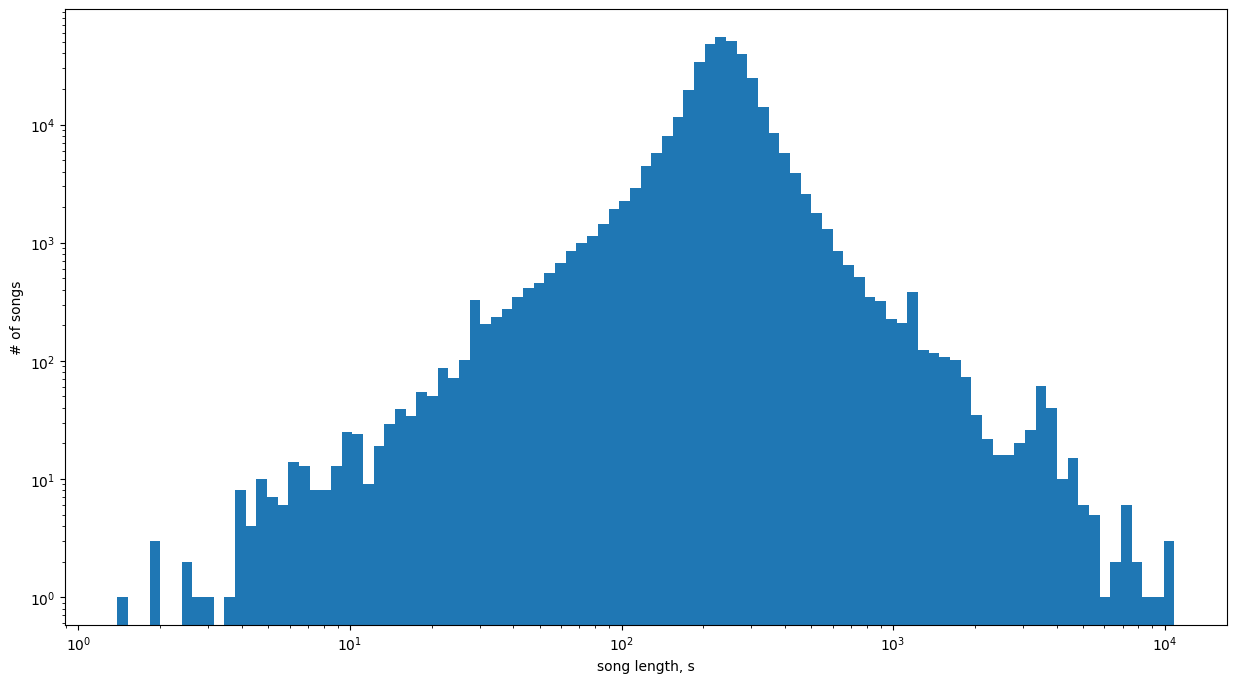

In [27]:
plt.figure(figsize=(15,8))
length_bins = np.logspace(np.log10(min_song_length_sec),np.log10(max_song_length_sec+1),100)
sns.distplot(song_data['song_length']/1000, bins=length_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('song length, s')
plt.ylabel('# of songs')
plt.yscale('log')
plt.xscale('log')